# Linear Models I

**Prerequisites**

- Linear Algebra
- Calculus


**Outcomes**

- Understand landscape of ML problems
- Know difference between regression and classification settings
- Be able to apply linear regression for regression and logisitc regression for classification
    - Using `statsmodels` and `scikit-learn`

In [2]:
pip install numpy

You should consider upgrading via the '/Users/fabrizio/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas

You should consider upgrading via the '/Users/fabrizio/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf
plt.style.use('seaborn')

## ML Paradigms

ML problems can be grouped into three broad categories

The categorization of a problem depends on the type of task to be performed

### Supervised Learning



-   Learn to map features to targets (labels)
-   Two main subtasks:
    1.  Regression: targets are continuous $\mathbb{Y} \subseteq \mathbb{R}^N$
    2.  Classification: targets in discrete space $\mathbb{Y} \subseteq \mathbb{N}^N$
    
    
> More detail to come today...

### Unsupervised Learning



-   Discover structure without labels
-   Many types of subtasks, including:
    -   Clustering
    -   Dimensionality reduction
    -   Compression
    
> Not for today

### Reinforcement learning



-   Main problem: agent (algorithm) learns to behave optimally through trial
    and error
-   Agent observes state $s \in \mathbb{S}$, takes an action $a \in \mathbb{A}(s)$, observes a reward $r \in \mathbb{R}$ and new state $s'\in\mathbb{S}$
-   Goal is to maximize (discounted) sum of all rewards in potentially
    infinite episode

> Also not for today

## Supervised Learning

-   One of the most common ML tasks
-   Based on available data, learn relationships between variables
-   Alternatively: learn a mapping from an input (feature) space to an
    output space

![Simple Linear Regression](https://css-materials.s3.amazonaws.com/ML/linear_models_1/supervised_learning.png)

### Some Examples

-   Predicting gross income of yet-to-be-released movie
-   Real estate pricing prediction
-   Any time series forecasting problem
-   Predicting wage based on demographic and educational features
-   Identifying faces in a photo
-   Predicting likelihood of default on a loan based on lender characteristics

### Supervised Learning: Data

- Features or inputs: $\mathbb{X} \subseteq \mathbb{R}^N$
    - Might require transformations
    - Images are matrix of RGB triplets
    - Text can be tokenized where each word is assigned an integer
    

- Output space $\mathbb{Y} \subseteq \mathbb{R}^M$ (regression) or $\mathbb{Y} \subseteq \mathbb{N}^M$ (classification)
    - Classification often requires transformation:
        - Discrete categories (A, B, C, D, F) into numbers (1, 2, 3, 4, 5)
        - Binary output is common: hot/cold, default/not default, win/lose, etc.

- For now, assume $\mathbb{Y} \subseteq \mathbb{R}$

### Supervised Learning: Model

- Model: a family of functions indexed by a vector of parameters $\theta$: $$\hat{y} = f(x;\theta)$$
- Parameters $\theta$ must be *learned*
- Learning happens by examining a *loss function*
    - Most common is **squared loss**: $$\ell(y - \hat{y}) = (y - \hat{y})^2$$
    - Sum of squared errors: $$SSE \triangleq \sum_{i=1}^N(y_i - \hat{y}_i)^2$$
    - Mean squared error (average loss): $$MSE(\theta) = \frac{1}{N} SSE$$

### Supervised Learning: Learning

- Loss function: $$MSE(\theta) = \frac{1}{N} \sum_{i=1}^N \left(y_i \hat{y}_i \right)^2 = \frac{1}{N} \left\| y - \hat{y} \right\|^2$$
- Learning algorithm
    - Find $\theta^*$ such that $\hat{y}_i \approx y_i$
    - This is done by minimizing average training loss (or MSE) on training set
    - Algorithm and approach should vary based on choice of loss function ($\ell$) and model ($f$)
- Prediction: $$\hat{y}^* = f(x ; \theta^*)$$

### Summary

Ingredients to supervised learning:

1. Cleaned/transformed data $(x_i, y_i)_{i=1}^N$
2. Choice of model $\hat{y} = f(x; \theta)$
3. Choice of loss function $\ell(y, \hat{y})$
4. Strategy for updating parameters $\theta$ to minimize $\ell(y, \hat{y})$

## Linear Models

We'll focus now on regression problems using linear models



### Linearity

First, a reminder:

- Let $a_1, a_2 \in \mathbb{R}$, $x, x_1, x_2 \in \mathbb{X}$, $\theta, \theta_1, \theta_2 \in \mathbb{\theta}$
-   A function $f: \mathbb{X} \times \mathbb{\theta} \rightarrow \mathbb{R}^N $ is linear...
    -   in data ($x$) if $f(a_1 \mathbf{x}_1 + a_2 \mathbf{x}_2 | \theta) = a_1 f(\mathbf{x}_1|\theta) + a_2 f(\mathbf{x}_2|\theta)$ 
    -   in parameters ($\theta$) if $f(\mathbf{x}|a_1 \theta_1 + a_2 \theta_2) = a_1 f(\mathbf{x}|\theta_1) + a_2 f(\mathbf{x}|\theta_2)$
-   Without loss of generality a linear function $f$ can be represented as a
    matrix equation
-   The following model is linear in both data and parameters: $$f(x;\theta) = x^T \theta$$


### Simple Linear Regression

- Spaces: $\mathbb{Y}, \mathbb{X}, \mathbb{\theta} \subseteq \mathbb{R}$
- Model: $\hat{y} = f(x; \theta) = \theta x$
- Data: $(x, y)$ pairs

#### Setting: Graphically

- Model: All straight lines that pass through the origin

![Simple Linear Regression](https://css-materials.s3.amazonaws.com/ML/linear_models_1/simple_linreg.png)

### Average Training Loss

- MSE on training set is 

\begin{align*}
    MSE(\theta) & = \frac{1}{N} \sum_{i=1}^N \left ( y_i - \hat{y}_i \right )^2 \\
    &= \frac{1}{N} \sum_{i=1}^N \left ( y_i - \theta x_i \right )^2 \\
\end{align*}

- To find $\theta^* \triangleq \text{argmin}_\theta MSE(\theta)$, take derivative: 
\begin{align*}
\frac{\partial MSE}{\partial \theta} &= \frac{2}{N} \sum_{i=1}^N \left(y_i - \theta x_i \right) x_i \\ 
&= \frac{2}{N} \left( x^T y - \theta \left\|x\right\|^2\right)
\end{align*}

- Set $= 0$ and solve for $\theta$: $$\theta^* = \frac{x^T y}{\left\|x \right\|^2}$$

### Example

- Source: Acemoglu, Johnson and Robinson, 2001 (AJR)
- Setting
    - Goal of authors is to measure institutional differences and economic outcomes
- Output: (`logpgp95`) Log GDP per capita in 1995 (USD equivalent)
- Input (`avexpr`): index of protection against expropriation on average over 1985-95

In [5]:
df1 = pd.read_stata('https://github.com/QuantEcon/lecture-python/blob/master/source/_static/lecture_specific/ols/maketable1.dta?raw=true')
df1.head()

,shortnam,euro1900,excolony,avexpr,logpgp95,cons1,cons90,democ00a,cons00a,extmort4,logem4,loghjypl,baseco
0,AFG,0.000000,1.0,NaN,NaN,1.0,2.0,1.0,1.0,93.699997,4.540098,NaN,NaN
1,AGO,8.000000,1.0,5.363636,7.770645,3.0,3.0,0.0,1.0,280.000000,5.634789,-3.411248,1.0
2,ARE,0.000000,1.0,7.181818,9.804219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ARG,60.000004,1.0,6.386364,9.133459,1.0,6.0,3.0,3.0,68.900002,4.232656,-0.872274,1.0
4,ARM,0.000000,0.0,NaN,7.682482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


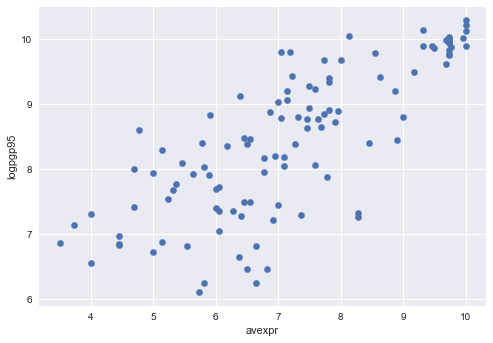

In [6]:
df1.plot.scatter(x="avexpr", y="logpgp95", s=40);

In [7]:
df1_subset = df1.dropna(subset=['logpgp95', 'avexpr'])
# drop the NA spaces

x = df1_subset["avexpr"].to_numpy() # input
y = df1_subset["logpgp95"].to_numpy() # output
theta_star = x @ y / (x @ x) # transpose
yhat = x * theta_star
mse_star = np.mean((y - yhat)**2)
print(f"The optimal coefficient is {theta_star:.3}\nMSE(theta*) = {mse_star:.3}")

The optimal coefficient is 1.14
MSE(theta*) = 1.61


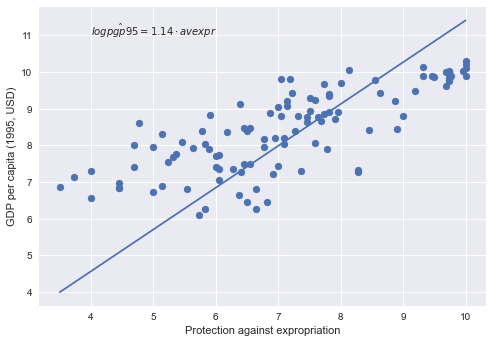

In [8]:
fig, ax = plt.subplots()
xgrid = np.linspace(min(x), max(x), 20)
ax.scatter(x, y)
ax.plot(xgrid, theta_star*xgrid)
ax.text(4, 11, r"$\hat{logpgp95} = 1.14 \cdot avexpr$")
ax.set_xlabel("Protection against expropriation")
ax.set_ylabel("GDP per capita (1995, USD)");

### Using statsmodels

- We computed $\theta^*$ by hand above
- We could also use the `statsmodels` package
- Here's how that could go

In [9]:
model = smf.ols("logpgp95 ~ avexpr - 1", data=df1)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               logpgp95   R-squared (uncentered):                   0.978
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                              4880.
Date:                Sun, 06 Feb 2022   Prob (F-statistic):                    5.82e-93
Time:                        22:29:59   Log-Likelihood:                         -183.80
No. Observations:                 111   AIC:                                      369.6
Df Residuals:                     110   BIC:                                      372.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
avexpr         1.1408      0.016     69.859      0.000       1.108       1.173
==============================================================================
Omnibus:                        7.509   Durbin-Watson:                   1.687
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                4.116
Skew:                           0.266   Prob(JB):                        0.128
Kurtosis:                       2.220   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Comments

- We saw that training amounts to computing the optimal $\theta$ from the available, observed data
- In the scenario we are considering, training is trivial in the sense that the optimal parameter value was found in closed form
- The optimal parameter can even be found visually by graphing MSE vs. $\theta$

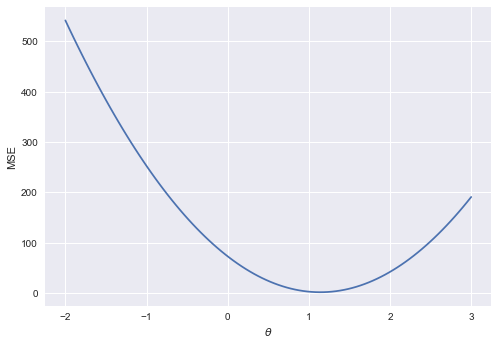

In [10]:
th_grid = np.linspace(-2, 3, 100) # prediction of minimum point of all the potential thetas

# y: (N,) x: (N,) th_grid(100,) --> N element array and we cannot add them up directli
# --> so we have to do broadcast (N x times 100 different thetas)
# Y[:, None]: (N, 1) x[:, None] (N, 1) th_grid: (100,) --> oobserved data
# th_grid*x[:, None] --> [N, 100] --> prediction from the model
mse_grid = np.mean((y[:, None] - th_grid*x[:, None])**2, axis=0) 

# plot this 
fig, ax = plt.subplots()
ax.plot(th_grid, mse_grid)
ax.set_xlabel(r"$\theta$")
ax.set_ylabel("MSE");

### Multiple Linear Regression

- Data: $\mathbb{X}, \mathbb{\theta} \subseteq \mathbb{R}^D$, $\mathbb{Y} \subseteq \mathbb{R}$
- Model: $\hat(y) = f(x; \theta) = x^T \theta$, all hyperplanes that pass through origin
- Predictions on samples:
\begin{align*}
\hat{y} = \begin{bmatrix}\hat{y}_1 \\ \cdots \\ \hat{y}_N\end{bmatrix}
    = \begin{bmatrix} x_1^T \theta \\ \cdots \\ x_N^T \theta \end{bmatrix}
    = \underbrace{\begin{bmatrix} x_1^T  \\ \cdots \\ x_N^T  \end{bmatrix}}_{\triangleq X}\theta
    = X \theta
\end{align*}

### MSE


- In this setting the MSE is: 
\begin{align*}
MSE(\theta) &= \frac{1}{N} \left\|x - X \theta \right\|^2 \\
&= \frac{1}{N} (y - X\theta)^T(y - X \theta) \\
&= \frac{1}{N} \left(y^T y - 2 \theta^T X^T y + \theta ^T \underbrace{X^T X}_{\equiv R} \theta \right)
\end{align*}
- Take derivative wrt $\theta$: $$\frac{\partial MSE}{\partial \theta} = \frac{1}{N} \left(-2 X^T y + 2 R\theta \right)$$
- Solve for $\theta^*$: $$\theta*^ = \underbrace{R^{-1}X^T}_{\equiv X^{\dagger}} y = X^{\dagger} y$$


###  Comments about $R$


We have $$R \triangleq X^TX \in \mathbb{R}^{D \times D}$$

- If $N < D$ (more features than samples) then $R$ will not be invertible
- In this case $\theta^*$ is not uniquely identified
    - Example $N=1, D=2$
    - There are infinitely many planes that pass through the origin and one sample
    - In all cases MSE = 0
- Therefore, we need at least one sample per features

###  Comments about $X^{\dagger}$


We have $$X^{\dagger} \triangleq R^{-1}X^T = (X^TX)^{-1}X^T \in \mathbb{R}^{D \times N}$$

- Called the Moore-Penrose Pseudo-Inverse of $X$
- Consider the system of equations: $$y = X \theta$$
- If $X$ is square (and invertible), we can solve $\theta = X^{-1} y$
- If $X$ has more rows than columns (more samples than features),  then $X^{-1}$ is not defined
    - In this setting we use $X^{\dagger}$ as if it were $X^{-1}$ and compute $\theta = X^{\dagger} y$

### Example

- Let's extend the AJR example to include an intercept term
- The model we will fit is $$\hat{\text{logpgp95}} = \theta_0 + \theta_1 \text{avexpr}$$
- In this case, our matrix $X$ is $$X \equiv \begin{bmatrix} 1 & \text{avexpr} \\ 1 & \text{avexpr}_2 \\ \vdots & \vdots \\ 1 & \text{avexpr}_N \end{bmatrix}$$

In [11]:
# fit the model by using the data that contains no missing value
# + 1 implies larger intereception

model2 = smf.ols("logpgp95 ~ 1 + avexpr", data=df1_subset)  # or formula "logpgp95 ~ avexpr"
fit2 = model2.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logpgp95   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     171.4
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           4.16e-24
Time:                        22:30:00   Log-Likelihood:                -119.71
No. Observations:                 111   AIC:                             243.4
Df Residuals:                     109   BIC:                             248.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6261      0.301     15.391      0.000       4.030       5.222
avexpr         0.5319      0.041     13.093      0.000       0.451       0.612
==============================================================================
Omnibus:                        9.251   Durbin-Watson:                   1.689
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                9.170
Skew:                          -0.680   Prob(JB):                       0.0102
Kurtosis:                       3.362   Cond. No.                         33.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the readout above we can say that the optimal linear regression model for this probem is:

In [12]:
theta2 = fit2.params 
# we can extracr the parameterrs
# compute the fitted model
print(f"logpgp95 = {theta2[0]:.3} + {theta2[1]:.3} avexpr")

logpgp95 = 4.63 + 0.532 avexpr


### Prediction

We can use our model to make predictions about the level of GDP per capita, given a specific level of the expropriation protection index

For example, consider a country with an average level of the index

In [13]:
mean_expr = df1[['avexpr']].mean()
mean_expr

avexpr    7.06649
dtype: float32

In [14]:
# use the model to get the prediction
predicted_logpdp95 = 4.63 + 0.53 * 7.07
predicted_logpdp95

8.3771

An easier way to do this would be to use the `.predict` method on our fit object

In [15]:
fit2.predict(mean_expr)

0    8.384553
dtype: float64

If we don't pass any arguments to `.predict`, it will compute $\hat{\text{logpgp95}}$ for all the data:

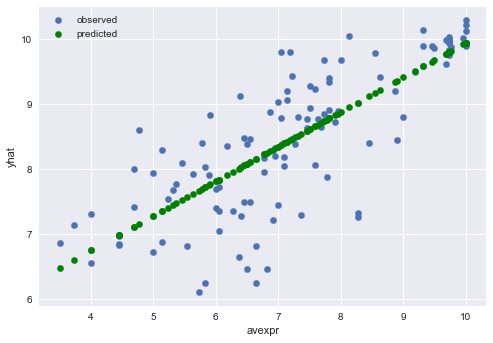

In [16]:
fig, ax = plt.subplots()
df1_subset.plot.scatter(x="avexpr", y="logpgp95", ax=ax, s=40)
df1_subset.assign(yhat=fit2.predict()).plot.scatter(x="avexpr", y="yhat", ax=ax, c="g", s=40)
ax.legend(["observed", "predicted"], loc=0)

### Using sklearn

- `statsmodels` is a great package for our linear regression example
- However, for other problems, a dedicated ML package may suit our needs better
- scikit-learn (`sklearn`) is the go-to Python package for classic ML algorithms

#### sklearn Model API

- One of the best features of sklearn is its well designed and consistent API
- All models in sklearn share the `BaseEsimator` api
- The two core methods are `.fit(X, y)` and `.predict`
- Let's replicate our example above using sklearn

In [17]:
from sklearn import linear_model

The first step is to create a model instance

This is where we pick a model $f$ from our notation

> Note, no data is passed at this time

In [18]:
skmodel = linear_model.LinearRegression()

The next step is to fit the model on (X, y) data

In [19]:
X = df1_subset[["avexpr"]]
y = df1_subset["logpgp95"]
skmodel.fit(X, y)

LinearRegression()

Now we can inspect coefficients:

In [20]:
(skmodel.intercept_, skmodel.coef_)

(4.62609, array([0.5318713], dtype=float32))

We can compare to statsmodels:

In [21]:
fit2.params

Intercept    4.626089
avexpr       0.531871
dtype: float64

Finally, we can use the `predict` method to estimate `logpgp95` for an arbitrary `avexpr`:


In [22]:
skmodel.predict([mean_expr])

array([8.384554], dtype=float32)

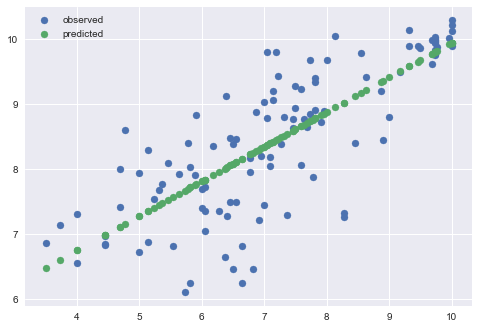

In [23]:
fig, ax = plt.subplots()
ax.scatter(X, y)
ax.scatter(X, skmodel.predict(X))
ax.legend(["observed", "predicted"]);

# sklearn fits the green line (predicted or fitted line)

#### sklearn metrics

- sklearn implements many models and algorithms as estimators
- It also has an extensive set of loss functions/metrics in the `metrics` subpackage
- The common API for each of these metrics is `metrics.metric_name(y, yhat)`

Let's evaluate the MSE using sklearn:

In [24]:
from sklearn import metrics
metrics.mean_squared_error(y, skmodel.predict(X))

0.50613296

In [25]:
np.mean((y - skmodel.predict(X))**2)

0.5061329007148743

### Aside: Computing $\theta^*$ in pratice

- We saw above that we can solve for $\theta^*$ by:
    1. Computing $R = X^T X$
    2. Inverting $R$ to get $R^{-1}$
    3. Computing $X^{\dagger} = R^{-1}X^T$
    4. Computing $\theta^* = X^{\dagger} y$

- However, in practice we compute $\theta*$ by iteratively minimizing the MSE
- This is more numerically stable than the direct approach (espeically inverting $R$)
- It also might be the only feasible approach if the data is "big"

### Tools: Fitted residual plots and polynomial regression

- One important skill is to be able to assess the goodness of fit for a model
- Ultimately the quality of fit is a function of the application of the model
- There are some common tools that can help make the evaluation process less subjective

#### Fitted residual plots

- For a model $f$, the *residual* for observation $i$ is $\epsilon_i \equiv y_i - f(x_i ; \theta)$
- Sometimes there can be a relationship between $y_i$ and $\epsilon_i$
- If this relationship is observable/obvious, it can prompt researcher to choose a more appropriate model

#### Example

- Data: from the built in `women` dataset from R language
- 15 observations of height and weigh

In [26]:
df2 = pd.read_csv("https://css-materials.s3.amazonaws.com/ML/linear_models_1/women.csv")
df2[["height", "weight"]]

,height,weight
0,58,115
1,59,117
2,60,120
3,61,123
4,62,126
5,63,129
6,64,132
7,65,135
8,66,139
9,67,142


Linear fit looks quite accurate

In [27]:
# construct the model

modelw = smf.ols("weight ~ height", data=df2)
fitw = modelw.fit()
fitw.summary()

/Users/fabrizio/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     1433.
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           1.09e-14
Time:                        22:30:13   Log-Likelihood:                -26.541
No. Observations:                  15   AIC:                             57.08
Df Residuals:                      13   BIC:                             58.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -87.5167      5.937    -14.741      0.000    -100.343     -74.691
height         3.4500      0.091     37.855      0.000       3.253       3.647
==============================================================================
Omnibus:                        2.396   Durbin-Watson:                   0.315
Prob(Omnibus):                  0.302   Jarque-Bera (JB):                1.660
Skew:                           0.789   Prob(JB):                        0.436
Kurtosis:                       2.596   Cond. No.                         982.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
print(f"mse = {fitw.ssr / df2.shape[0]:.4}")

mse = 2.016


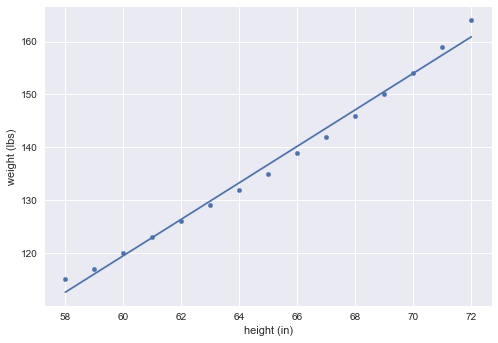

In [29]:
fig, ax = plt.subplots()
# plot data
df2.plot.scatter(x="height", y="weight", ax=ax)


# plot model
grid_height = np.linspace(df2["height"].min(), df2["height"].max(), 20)
ax.plot(grid_height, fitw.predict(pd.Series(grid_height, name="height")))

# lables
ax.set_xlabel("height (in)")
ax.set_ylabel("weight (lbs)");

Let's now take a look at the fitted residuals

Text(0, 0.5, '$\\hat{\\epsilon}$')

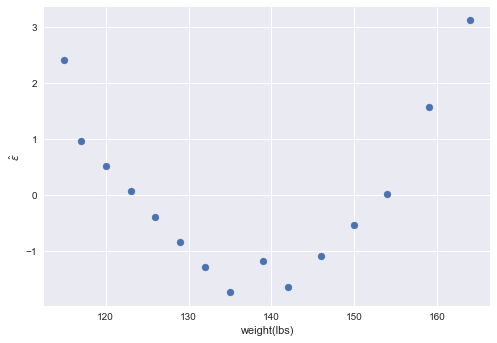

In [30]:
# fit model and then compute the residuals e
# a model that may perform better

epsw = fitw.resid
fig, ax = plt.subplots()
ax.scatter(df2["weight"], epsw)
ax.set_xlabel("weight(lbs)")
ax.set_ylabel(r"$\hat{\epsilon}$")

Here we can observe a clear quadratic pattern

This might suggest that we should add a quadratic term to our regression...

In [31]:
# fit model
modelw2 = smf.ols("weight ~ height + I(height*height)", data=df2)
fitw2 = modelw2.fit()
fitw2.summary()

# mse improved

/Users/fabrizio/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.139e+04
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           2.13e-20
Time:                        22:30:15   Log-Likelihood:                -5.2563
No. Observations:                  15   AIC:                             16.51
Df Residuals:                      12   BIC:                             18.64
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            261.8782     25.197     10.393      0.000     206.979     316.777
height                -7.3483      0.778     -9.449      0.000      -9.043      -5.654
I(height * height)     0.0831      0.006     13.891      0.000       0.070       0.096
==============================================================================
Omnibus:                        2.449   Durbin-Watson:                   1.144
Prob(Omnibus):                  0.294   Jarque-Bera (JB):                1.033
Skew:                           0.049   Prob(JB):                        0.597
Kurtosis:                       1.718   Cond. No.                     1.09e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
print(f"mse = {fitw2.ssr / df2.shape[0]:.4}")

mse = 0.118


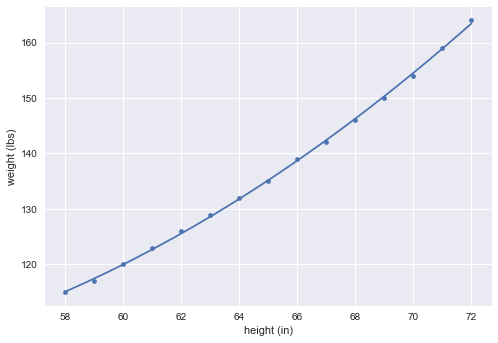

In [33]:
fig, ax = plt.subplots()
# plot data
df2.plot.scatter(x="height", y="weight", ax=ax)


# plot model
grid_height = np.linspace(df2["height"].min(), df2["height"].max(), 20)
ax.plot(grid_height, fitw2.predict(pd.Series(grid_height, name="height")))

# lables
ax.set_xlabel("height (in)")
ax.set_ylabel("weight (lbs)");

Text(0, 0.5, '$\\hat{\\epsilon}$')

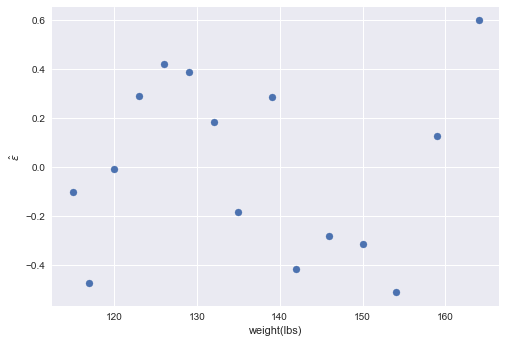

In [34]:
epsw2 = fitw2.resid
fig, ax = plt.subplots()
ax.scatter(df2["weight"], epsw2)
ax.set_xlabel("weight(lbs)")
ax.set_ylabel(r"$\hat{\epsilon}$")

Now the fitted residual plot looks like random noise

#### Comments

- Note that the model including the quadratic height squared term is still a *linear* regression
- When speaking about regression models, linearity refers to the parameters, not the data
- We can apply arbitrary transformations to $x$ before multiplying by $\theta$ to produce a prediction
- Much of the art of applied ML is choosing the transformations wisely

### Logistic Regression

- Our linear regression framework can be extended to predict a binary outcome
- In this case $\mathbb{Y} =  \{0,1 \}$
- The key to using this framework is change one assumption:
    - Instead of assuming $y$ is linear in $x$, $\theta$...
    - We assume that the log odds are linear in $x, \theta$

#### Log Odds

- Let $Y$ be a Bernoulli distributed random variable
- Let $p = P(Y = 1)$ represent the probability that $Y = 1$
- The *odds* that $Y = 1$ are given by $\frac{p}{1-p}$
- The *logistic regression* framework assumes that the log odds are linear in $\theta$: $$\log \frac{\hat{y}_i}{1-\hat{y}_i} = x^T \theta$$

#### Logistic Function


- If we re-arrange the expression of log-odds, we can solve for $$\hat{y} = \frac{\exp(x^T\theta)}{1 + \exp(x^T\theta)}$$
- This is known as the *logistic function*, which is where logistic regression gets its name
- The logistic function has a range of $[0, 1]$, making it ideal for representing probabilities

(-0.1, 1.1)

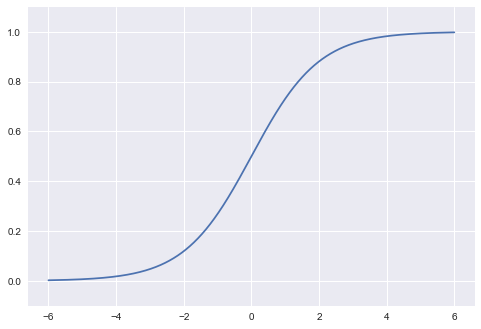

In [35]:
def logistic(x):
    return np.exp(x) / (1 + np.exp(x))
fig, ax = plt.subplots()
x = np.linspace(-6, 6, 1000)
ax.plot(x, logistic(x))
ax.set_ylim(-0.1, 1.1)

#### Example: credit card default

- We'll come back to how to compute the coefficients of this model in a later lecture
- For now, we will look at an example and lean on sklearn to do the computations
- Data: 10,000 observations of inidividual income and credit card balance
- From "An Introduction to Statistical Learning: With Applications in R" by James, Gareth, Daniela Witten, Trevor Hastie, and Robert Tibshirani. 2014

In [36]:
df3 = pd.read_csv("https://phbs-css.s3-ap-southeast-1.amazonaws.com/Module3/L04_linear_models/default.csv")
df3.info()
df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [37]:
# convert to boolean instead of strings "Yes" and "No"
df3["default"] = df3["default"] == "Yes"
df3["student"] = df3["student"] == "Yes"

To start, let's fit a linear regression for the default probability as a function of the credit card balance:

In [38]:
# create model
linreg = linear_model.LinearRegression()

# prep data
X = df3[["balance"]]
y = df3["default"]

# fit model
linreg.fit(X, y)

LinearRegression()

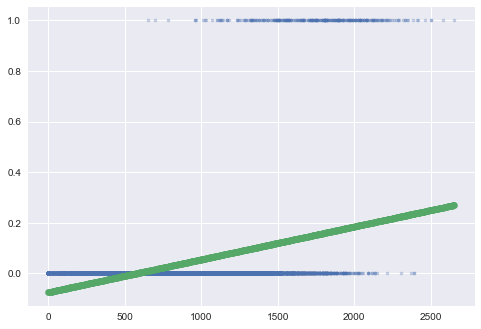

In [39]:
fig, ax = plt.subplots()
bal_grid = np.linspace(X.min(), X.max(), 500)
ax.scatter(X, y, alpha=0.3, s=10)
ax.scatter(bal_grid, linreg.predict(bal_grid), s=40)

- Notice that when the credit card balance is between 0 and 500, the predicted probability of default is negative
- This violates the definition of a probability, showcasing why linear regression is not the right model for this task

Now let's try fitting the loigistic regression.



In [40]:
# construct model
logreg = linear_model.LogisticRegression()

# fit model
logreg.fit(X, y)

LogisticRegression()

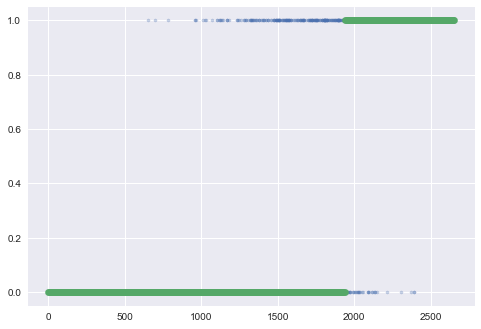

In [41]:
fig, ax = plt.subplots()
ax.scatter(X, y, alpha=0.3, s=10)
ax.scatter(bal_grid, logreg.predict(bal_grid), s=40)

- Notice now that the predicted probabilities are squarely between 0 and 1